In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:

# Load the dataset and preprocess it
data = pd.read_csv('/home/muskan/Desktop/monsoon24/DA/data-analytics-1-assignments/a5/Dataset_a5/Dataset1/marketing_campaign.csv')

# Handle missing values for 'Income' by imputing with median
imputer = SimpleImputer(strategy='median')
data['Income'] = imputer.fit_transform(data[['Income']])

# Encode categorical variables
label_encoder = LabelEncoder()
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])

# Drop columns that may not be relevant for clustering
data = data.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'])

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert scaled data back to DataFrame for easier interpretation
data_preprocessed = pd.DataFrame(data_scaled, columns=data.columns)


In [8]:
# K-Means algorithm from scratch
class KMeansScratch:
    def __init__(self, k, max_iters=100, tolerance=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance
        self.centroids = None

    def fit(self, data):
        n_samples, n_features = data.shape
        self.centroids = data[np.random.choice(n_samples, self.k, replace=False)]

        for i in range(self.max_iters):
            # Assign clusters based on closest centroid
            clusters = self._create_clusters(data)
            
            # Calculate new centroids
            new_centroids = np.array([data[clusters == j].mean(axis=0) for j in range(self.k)])
            
            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tolerance):
                break
            self.centroids = new_centroids

        self.labels_ = np.array([self._closest_centroid(data_point) for data_point in data])

    def _create_clusters(self, data):
        return np.array([self._closest_centroid(data_point) for data_point in data])

    def _closest_centroid(self, data_point):
        distances = [np.linalg.norm(data_point - centroid) for centroid in self.centroids]
        return np.argmin(distances)

    def predict(self, data):
        return np.array([self._closest_centroid(data_point) for data_point in data])

    def inertia(self, data):
        return np.sum([np.linalg.norm(data_point - self.centroids[cluster]) ** 2 for data_point, cluster in zip(data, self.labels_)])


In [9]:

# Silhouette score calculation
def silhouette_score(data, labels):
    n = data.shape[0]
    a = np.zeros(n)
    b = np.zeros(n)
    
    for i in range(n):
        own_cluster = data[labels == labels[i]]
        other_clusters = [data[labels == label] for label in set(labels) if label != labels[i]]
        
        # Intra-cluster distance
        a[i] = np.mean([np.linalg.norm(data[i] - point) for point in own_cluster if not np.array_equal(point, data[i])])
        
        # Inter-cluster distance
        b[i] = np.min([np.mean([np.linalg.norm(data[i] - point) for point in cluster]) for cluster in other_clusters])
        
    # Silhouette score
    silhouette_vals = (b - a) / np.maximum(a, b)
    return np.mean(silhouette_vals)



In [10]:

# Testing KMeans from scratch for different values of k
k_values = [2, 5, 7, 9]
inertia_scores = {}
silhouette_scores = {}

for k in k_values:
    kmeans = KMeansScratch(k=k)
    kmeans.fit(data_preprocessed.values)
    inertia_scores[k] = kmeans.inertia(data_preprocessed.values)
    silhouette_scores[k] = silhouette_score(data_preprocessed.values, kmeans.labels_)


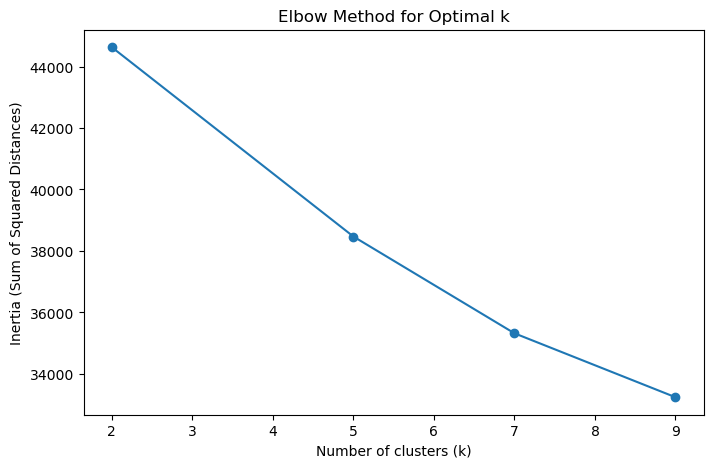

Silhouette Score for k=2: 0.24138353155892642
Silhouette Score for k=5: 0.1445746290748959
Silhouette Score for k=7: 0.0877481025933206
Silhouette Score for k=9: 0.10273716303571782


In [11]:

# Plot elbow method results
plt.figure(figsize=(8, 5))
plt.plot(list(inertia_scores.keys()), list(inertia_scores.values()), marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.show()

# Display silhouette scores
for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score}')